In [0]:
!pip install tensorflow --upgrade

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.1.0)


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters
from tensorflow.keras import models, layers, utils, optimizers

In [0]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2113536/2110848 [==============================] - 0s 0us/step


In [0]:
print(len(train_data))
print(len(test_data))

8982
2246


In [0]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
def one_hot_encode(labels, dimensions = 46):
  results = np.zeros((len(labels), dimensions))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results

#or can use
#one_hot_train_labels = utils.to_categorical(train_labels)
#one_hot_test_labels = utils.to_categorical(test_labels)

In [0]:
one_hot_train_labels = one_hot_encode(train_labels)
one_hot_test_labels = one_hot_encode(test_labels)

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 218us/sample - loss: 2.6330 - acc: 0.5055 - val_loss: 1.7484 - val_acc: 0.6240
Epoch 2/20
7982/7982 [==============================] - 1s 133us/sample - loss: 1.4402 - acc: 0.6982 - val_loss: 1.3257 - val_acc: 0.6990
Epoch 3/20
7982/7982 [==============================] - 1s 128us/sample - loss: 1.0738 - acc: 0.7704 - val_loss: 1.1573 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 130us/sample - loss: 0.8569 - acc: 0.8160 - val_loss: 1.0514 - val_acc: 0.7770
Epoch 5/20
7982/7982 [==============================] - 1s 131us/sample - loss: 0.6893 - acc: 0.8567 - val_loss: 0.9996 - val_acc: 0.7920
Epoch 6/20
7982/7982 [==============================] - 1s 129us/sample - loss: 0.5553 - acc: 0.8851 - val_loss: 0.9580 - val_acc: 0.7980
Epoch 7/20
7982/7982 [==============================] - 1s 129us/sample - loss: 0.4517 - acc: 0.9059 - val_loss: 0.9112 - va

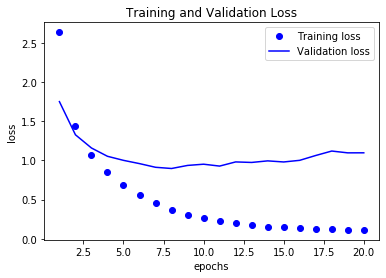

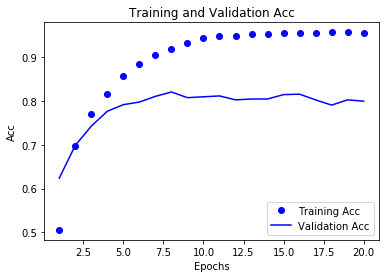

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label = 'Training Acc')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation Acc')
plt.title('Training and Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [0]:
predictions = model.predict(x_test)

In [0]:
predictions.shape

(2246, 46)

In [0]:
predictions

array([[8.5102547e-06, 9.7118627e-06, 8.0781440e-08, ..., 2.0325590e-06,
        8.3816317e-08, 3.4018287e-06],
       [3.0083897e-06, 2.3175911e-04, 2.5723486e-06, ..., 3.3360902e-08,
        1.9203818e-13, 2.7120253e-08],
       [7.2630523e-03, 5.2053732e-01, 7.1047095e-04, ..., 7.7237742e-04,
        1.6384439e-04, 6.1611575e-04],
       ...,
       [1.0797933e-06, 8.2698334e-06, 1.7899333e-07, ..., 2.1669887e-07,
        3.6167543e-07, 8.0492282e-07],
       [2.9198469e-03, 1.5284379e-01, 3.3238559e-04, ..., 7.6741126e-04,
        5.9085556e-05, 2.8421855e-04],
       [2.3717852e-04, 7.3881179e-01, 4.2382129e-03, ..., 2.4517224e-04,
        2.8174685e-05, 2.8600791e-04]], dtype=float32)

In [0]:
predictions[1].sum()

0.99999994

In [0]:
predictions[0].argmax()

3

**ALTERNATE APPROACH INSTEAD OF ONE_HOT_ENCODING**

In [0]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [0]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs = 20, batch_size=512)

Train on 8982 samples
Epoch 1/20
8982/8982 [==============================] - 2s 186us/sample - loss: 0.2342 - acc: 0.9392
Epoch 2/20
8982/8982 [==============================] - 1s 117us/sample - loss: 0.1675 - acc: 0.9478
Epoch 3/20
8982/8982 [==============================] - 1s 114us/sample - loss: 0.1420 - acc: 0.9505
Epoch 4/20
8982/8982 [==============================] - 1s 111us/sample - loss: 0.1306 - acc: 0.9537
Epoch 5/20
8982/8982 [==============================] - 1s 113us/sample - loss: 0.1259 - acc: 0.9548
Epoch 6/20
8982/8982 [==============================] - 1s 111us/sample - loss: 0.1164 - acc: 0.9541
Epoch 7/20
8982/8982 [==============================] - 1s 113us/sample - loss: 0.1135 - acc: 0.9537
Epoch 8/20
8982/8982 [==============================] - 1s 118us/sample - loss: 0.1122 - acc: 0.9560
Epoch 9/20
8982/8982 [==============================] - 1s 120us/sample - loss: 0.1099 - acc: 0.9557
Epoch 10/20
8982/8982 [==============================] - 1s 115us/sam

In [0]:
predictions = model.predict(x_test)

In [0]:
predictions[0]

array([1.6169462e-07, 2.4190563e-06, 1.7917940e-11, 9.9297297e-01,
       5.5293944e-03, 9.2727777e-11, 8.5180890e-12, 7.0095041e-08,
       8.9214451e-04, 1.1135763e-06, 2.1051886e-08, 1.7390872e-04,
       8.2858685e-07, 1.8557510e-06, 1.6421328e-08, 1.4549197e-10,
       1.1387378e-04, 2.3832369e-07, 3.4304193e-08, 1.7489468e-04,
       1.1661002e-04, 7.7365885e-06, 2.0673963e-10, 2.2119577e-06,
       3.1517915e-09, 3.4204513e-07, 1.2696952e-11, 1.3226101e-08,
       3.6019435e-06, 1.5400736e-09, 6.6507965e-08, 7.8012634e-13,
       2.0658720e-07, 3.1395695e-09, 4.7901305e-09, 4.5598487e-08,
       4.7999470e-06, 1.3078298e-08, 3.1462329e-07, 1.0957323e-07,
       1.5505881e-08, 8.6488772e-09, 5.0043619e-10, 3.7825969e-09,
       4.2934355e-13, 2.7497793e-10], dtype=float32)

In [0]:
predictions.shape

(2246, 46)

In [0]:
predictions[1].argmax()

10